In [1]:
import sys
!{sys.executable} -m pip -q install palantir fa2

In [2]:
import warnings
warnings.filterwarnings("ignore")
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout
## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline

sc.set_figure_params()
scf.set_figure_pubready()

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [3]:
adata = sc.read_h5ad(r"/mnt/c/Users/rodri/Downloads/nelson_main_online.h5ad")

In [48]:
adata_new = sc.read_h5ad(r"/mnt/c/Bioinf/nelson_azimuth_upd_EK_anno.h5ad")

In [4]:
adata.obs

samples  n_genes  \
HS_BM_1_AAACCCAAGACACACG_lund                GSE190965_sample_1     2264   
HS_BM_1_AAACCCAAGTGTTGTC_lund                GSE190965_sample_1     3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                GSE190965_sample_1      846   
HS_BM_1_AAACGAATCTCGTCGT_lund                GSE190965_sample_1     7441   
HS_BM_1_AAACGCTAGCGAGTCA_lund                GSE190965_sample_1     6539   
...                                                         ...      ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma  GSE202813_sample_8     2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma  GSE202813_sample_8     1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma  GSE202813_sample_8     1343   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma  GSE202813_sample_8     1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  GSE202813_sample_8     1435   

                                                   gse  age_yo  \
HS_BM_1_AAACCCAAGACACACG_lund                GSE190965     NaN   
HS_BM_1_AAACCCAAGTGTTGTC_lund                GSE190965     NaN   
HS_BM_1_AAACGAATCGCGTCGA_lund                GSE190965     NaN   
HS_BM_1_AAACGAATCTCGTCGT_lund                GSE190965     NaN   
HS_BM_1_AAACGCTAGCGAGTCA_lund                GSE190965     NaN   
...                                                ...     ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  GSE202813     NaN   

                                             n_genes_by_counts  \
HS_BM_1_AAACCCAAGACACACG_lund                             2262   
HS_BM_1_AAACCCAAGTGTTGTC_lund                             3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                              846   
HS_BM_1_AAACGAATCTCGTCGT_lund                             7434   
HS_BM_1_AAACGCTAGCGAGTCA_lund                             6535   
...                                                        ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma               2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma               1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma               1342   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma               1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma               1434   

                                             log1p_n_genes_by_counts  \
HS_BM_1_AAACCCAAGACACACG_lund                               7.724447   
HS_BM_1_AAACCCAAGTGTTGTC_lund                               8.202482   
HS_BM_1_AAACGAATCGCGTCGA_lund                               6.741701   
HS_BM_1_AAACGAATCTCGTCGT_lund                               8.913954   
HS_BM_1_AAACGCTAGCGAGTCA_lund                               8.785081   
...                                                              ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma                 7.610853   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma                 7.153834   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma                 7.202661   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma                 7.319865   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma                 7.268920   

                                             total_counts  log1p_total_counts  \
HS_BM_1_AAACCCAAGACACACG_lund                      8107.0            9.000607   
HS_BM_1_AAACCCAAGTGTTGTC_lund                     14151.0            9.557611   
HS_BM_1_AAACGAATCGCGTCGA_lund                      1421.0            7.259820   
HS_BM_1_AAACGAATCTCGTCGT_lund                     49892.0           10.817636   
HS_BM_1_AAACGCTAGCGAGTCA_lund                     41625.0           10.636480   
...                                                   ...                 ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma        4175.0            8.337109   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


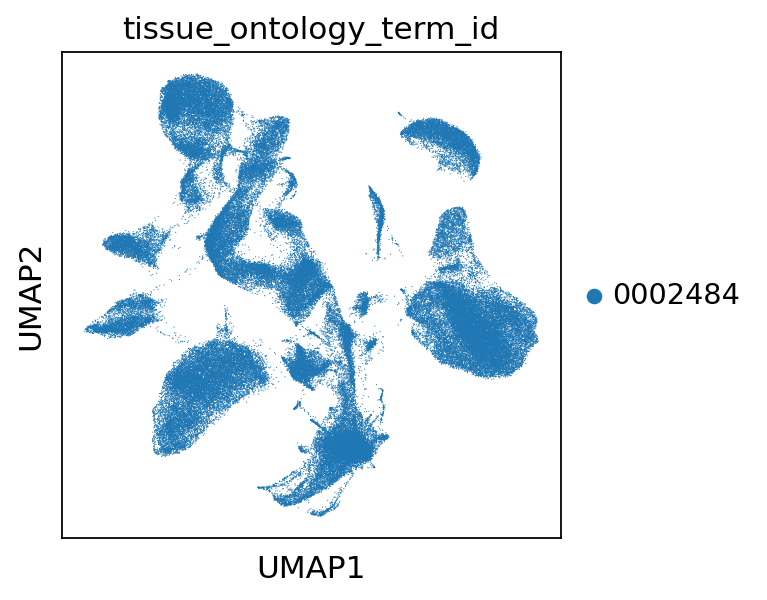

In [5]:
sc.pl.umap(adata, color = ['tissue_ontology_term_id'])

In [7]:
adata

AnnData object with n_obs × n_vars = 117308 × 1294
    obs: 'samples', 'n_genes', 'gse', 'age_yo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mit', 'log1p_total_counts_mit', 'pct_counts_mit', 'S_score', 'G2M_score', 'phase', 'leiden', 'disease_ontology_term_id', 'sex_ontology_term_id', 'doi', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'suspension_type'
    var: 'n_cells', 'mit', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batch_condition', 'default_embedding', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'title', 'umap', 'tissue_ontology_term_id_colors'
    ob

In [6]:
adata.obs['organism_ontology_term_id'] = 'NCBITaxon:9606'

In [7]:
adata.obs

samples  n_genes  \
HS_BM_1_AAACCCAAGACACACG_lund                GSE190965_sample_1     2264   
HS_BM_1_AAACCCAAGTGTTGTC_lund                GSE190965_sample_1     3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                GSE190965_sample_1      846   
HS_BM_1_AAACGAATCTCGTCGT_lund                GSE190965_sample_1     7441   
HS_BM_1_AAACGCTAGCGAGTCA_lund                GSE190965_sample_1     6539   
...                                                         ...      ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma  GSE202813_sample_8     2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma  GSE202813_sample_8     1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma  GSE202813_sample_8     1343   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma  GSE202813_sample_8     1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  GSE202813_sample_8     1435   

                                                   gse  age_yo  \
HS_BM_1_AAACCCAAGACACACG_lund                GSE190965     NaN   
HS_BM_1_AAACCCAAGTGTTGTC_lund                GSE190965     NaN   
HS_BM_1_AAACGAATCGCGTCGA_lund                GSE190965     NaN   
HS_BM_1_AAACGAATCTCGTCGT_lund                GSE190965     NaN   
HS_BM_1_AAACGCTAGCGAGTCA_lund                GSE190965     NaN   
...                                                ...     ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  GSE202813     NaN   

                                             n_genes_by_counts  \
HS_BM_1_AAACCCAAGACACACG_lund                             2262   
HS_BM_1_AAACCCAAGTGTTGTC_lund                             3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                              846   
HS_BM_1_AAACGAATCTCGTCGT_lund                             7434   
HS_BM_1_AAACGCTAGCGAGTCA_lund                             6535   
...                                                        ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma               2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma               1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma               1342   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma               1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma               1434   

                                             log1p_n_genes_by_counts  \
HS_BM_1_AAACCCAAGACACACG_lund                               7.724447   
HS_BM_1_AAACCCAAGTGTTGTC_lund                               8.202482   
HS_BM_1_AAACGAATCGCGTCGA_lund                               6.741701   
HS_BM_1_AAACGAATCTCGTCGT_lund                               8.913954   
HS_BM_1_AAACGCTAGCGAGTCA_lund                               8.785081   
...                                                              ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma                 7.610853   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma                 7.153834   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma                 7.202661   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma                 7.319865   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma                 7.268920   

                                             total_counts  log1p_total_counts  \
HS_BM_1_AAACCCAAGACACACG_lund                      8107.0            9.000607   
HS_BM_1_AAACCCAAGTGTTGTC_lund                     14151.0            9.557611   
HS_BM_1_AAACGAATCGCGTCGA_lund                      1421.0            7.259820   
HS_BM_1_AAACGAATCTCGTCGT_lund                     49892.0           10.817636   
HS_BM_1_AAACGCTAGCGAGTCA_lund                     41625.0           10.636480   
...                                                   ...                 ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma        4175.0            8.337109   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma 

In [8]:
adata.obs['development_stage_ontology_term_id'] = 'HsapDv:0000258'

In [9]:
adata.obs['tissue_ontology_term_id'] = 'UBERON:002484'

In [10]:
adata.obs['assay_ontology_term_id'] = 'EFO:0030080'

In [11]:
obs_dataframe = adata.obs

# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)
print(obs_dataframe)

                                                        samples  n_genes  \
HS_BM_1_AAACCCAAGACACACG_lund                GSE190965_sample_1     2264   
HS_BM_1_AAACCCAAGTGTTGTC_lund                GSE190965_sample_1     3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                GSE190965_sample_1      846   
HS_BM_1_AAACGAATCTCGTCGT_lund                GSE190965_sample_1     7441   
HS_BM_1_AAACGCTAGCGAGTCA_lund                GSE190965_sample_1     6539   
...                                                         ...      ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma  GSE202813_sample_8     2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma  GSE202813_sample_8     1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma  GSE202813_sample_8     1343   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma  GSE202813_sample_8     1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  GSE202813_sample_8     1435   

                                                   gse  age_yo  \
HS_BM_1_AAACCCAAGACAC

In [14]:
adata.uns

OverloadedDict, wrapping:
	{'batch_condition': array(['samples', 'source'], dtype=object), 'default_embedding': 'X_umap', 'hvg': {'flavor': 'seurat'}, 'leiden': {'params': {'n_iterations': -1, 'random_state': 0, 'resolution': 0.4}}, 'leiden_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d'],
      dtype=object), 'log1p': {}, 'neighbors': {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'method': 'umap', 'metric': 'euclidean', 'n_neighbors': 30, 'n_pcs': 15, 'random_state': 0, 'use_rep': 'X_pca_harmony'}}, 'pca': {'params': {'use_highly_variable': True, 'zero_center': True}, 'variance': array([89.85194172, 30.14582263, 26.98673234, 20.57879174, 19.03795571,
       15.33986148, 13.98523239, 12.04257425, 10.51431228,  9.6246165 ,
        9.32926653,  8.11305986,  6.81980488,  5.39663141,  5.09

In [16]:
adata.raw.X

<117308x36907 sparse matrix of type '<class 'numpy.float64'>'
	with 168229884 stored elements in Compressed Sparse Row format>

In [13]:
adata.obs

samples  n_genes  \
HS_BM_1_AAACCCAAGACACACG_lund                GSE190965_sample_1     2264   
HS_BM_1_AAACCCAAGTGTTGTC_lund                GSE190965_sample_1     3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                GSE190965_sample_1      846   
HS_BM_1_AAACGAATCTCGTCGT_lund                GSE190965_sample_1     7441   
HS_BM_1_AAACGCTAGCGAGTCA_lund                GSE190965_sample_1     6539   
...                                                         ...      ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma  GSE202813_sample_8     2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma  GSE202813_sample_8     1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma  GSE202813_sample_8     1343   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma  GSE202813_sample_8     1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  GSE202813_sample_8     1435   

                                                   gse  age_yo  \
HS_BM_1_AAACCCAAGACACACG_lund                GSE190965     NaN   
HS_BM_1_AAACCCAAGTGTTGTC_lund                GSE190965     NaN   
HS_BM_1_AAACGAATCGCGTCGA_lund                GSE190965     NaN   
HS_BM_1_AAACGAATCTCGTCGT_lund                GSE190965     NaN   
HS_BM_1_AAACGCTAGCGAGTCA_lund                GSE190965     NaN   
...                                                ...     ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma  GSE202813     NaN   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  GSE202813     NaN   

                                             n_genes_by_counts  \
HS_BM_1_AAACCCAAGACACACG_lund                             2262   
HS_BM_1_AAACCCAAGTGTTGTC_lund                             3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                              846   
HS_BM_1_AAACGAATCTCGTCGT_lund                             7434   
HS_BM_1_AAACGCTAGCGAGTCA_lund                             6535   
...                                                        ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma               2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma               1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma               1342   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma               1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma               1434   

                                             log1p_n_genes_by_counts  \
HS_BM_1_AAACCCAAGACACACG_lund                               7.724447   
HS_BM_1_AAACCCAAGTGTTGTC_lund                               8.202482   
HS_BM_1_AAACGAATCGCGTCGA_lund                               6.741701   
HS_BM_1_AAACGAATCTCGTCGT_lund                               8.913954   
HS_BM_1_AAACGCTAGCGAGTCA_lund                               8.785081   
...                                                              ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma                 7.610853   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma                 7.153834   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma                 7.202661   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma                 7.319865   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma                 7.268920   

                                             total_counts  log1p_total_counts  \
HS_BM_1_AAACCCAAGACACACG_lund                      8107.0            9.000607   
HS_BM_1_AAACCCAAGTGTTGTC_lund                     14151.0            9.557611   
HS_BM_1_AAACGAATCGCGTCGA_lund                      1421.0            7.259820   
HS_BM_1_AAACGAATCTCGTCGT_lund                     49892.0           10.817636   
HS_BM_1_AAACGCTAGCGAGTCA_lund                     41625.0           10.636480   
...                                                   ...                 ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma        4175.0            8.337109   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma 

In [14]:
adata_new.obs

nCount_RNA  nFeature_RNA  \
HS_BM_1_AAACCCAAGACACACG_lund                    8107.0          2262   
HS_BM_1_AAACCCAAGTGTTGTC_lund                   14151.0          3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                    1421.0           846   
HS_BM_1_AAACGAATCTCGTCGT_lund                   49892.0          7434   
HS_BM_1_AAACGCTAGCGAGTCA_lund                   41625.0          6535   
...                                                 ...           ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma      4175.0          2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma      2190.0          1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma      2467.0          1342   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma      2225.0          1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma      2921.0          1434   

                                             percent.mt  nCount_refAssay  \
HS_BM_1_AAACCCAAGACACACG_lund                  5.390403           8107.0   
HS_BM_1_AAACCCAAGTGTTGTC_lund                  2.989188          14151.0   
HS_BM_1_AAACGAATCGCGTCGA_lund                 12.737509           1421.0   
HS_BM_1_AAACGAATCTCGTCGT_lund                  4.964724          49892.0   
HS_BM_1_AAACGCTAGCGAGTCA_lund                  2.534535          41625.0   
...                                                 ...              ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma    2.491018           4175.0   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma    1.826484           2190.0   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma    0.770166           2467.0   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma    1.528090           2225.0   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma    5.546046           2921.0   

                                             nFeature_refAssay  \
HS_BM_1_AAACCCAAGACACACG_lund                             2262   
HS_BM_1_AAACCCAAGTGTTGTC_lund                             3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                              846   
HS_BM_1_AAACGAATCTCGTCGT_lund                             7434   
HS_BM_1_AAACGCTAGCGAGTCA_lund                             6535   
...                                                        ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma               2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma               1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma               1342   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma               1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma               1434   

                                             predicted.celltype.l2.score  \
HS_BM_1_AAACCCAAGACACACG_lund                                   0.987600   
HS_BM_1_AAACCCAAGTGTTGTC_lund                                   0.960147   
HS_BM_1_AAACGAATCGCGTCGA_lund                                   0.448618   
HS_BM_1_AAACGAATCTCGTCGT_lund                                   1.000000   
HS_BM_1_AAACGCTAGCGAGTCA_lund                                   0.921464   
...                                                                  ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma                     1.000000   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma                     1.000000   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma                     0.999566   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma                     0.540476   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma                     0.480871   

                                             predicted.celltype.l2  \
HS_BM_1_AAACCCAAGACACACG_lund                                    3   
HS_BM_1_AAACCCAAGTGTTGTC_lund                                    4   
HS_BM_1_AAACGAATCGCGTCGA_lund                                    5   
HS_BM_1_AAACGAATCTCGTCGT_lund                                    6   
HS_BM_1_AAACGCTAGCGAGTCA_lund                                    7   
...                                                            ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma                

In [50]:
adata_new.obs['predicted.celltype.l1'] = adata_new.obs['predicted.celltype.l1'].astype('str')

In [51]:
old_to_new = {
'0' : 'Endothelial',
                        '1' : 'Osteo-lineage',
                        '2' : 'Smooth-muscle',
                        '3' : 'HSPC',
                        '4' : 'Mono',
                        '5' : 'CD4 T',
                        '6' : 'B',
                        '7' : 'DC',
                        '8' : 'CD8 T',
                        '9' : 'NK',
                        '10' : 'Stromal',
                        '11' : 'Other T'}
adata_new.obs['predicted.celltype.l1'] = (
adata_new.obs['predicted.celltype.l1']
.map(old_to_new).astype('category')
)

In [44]:
sc.set_figure_params(figsize = [12,12])

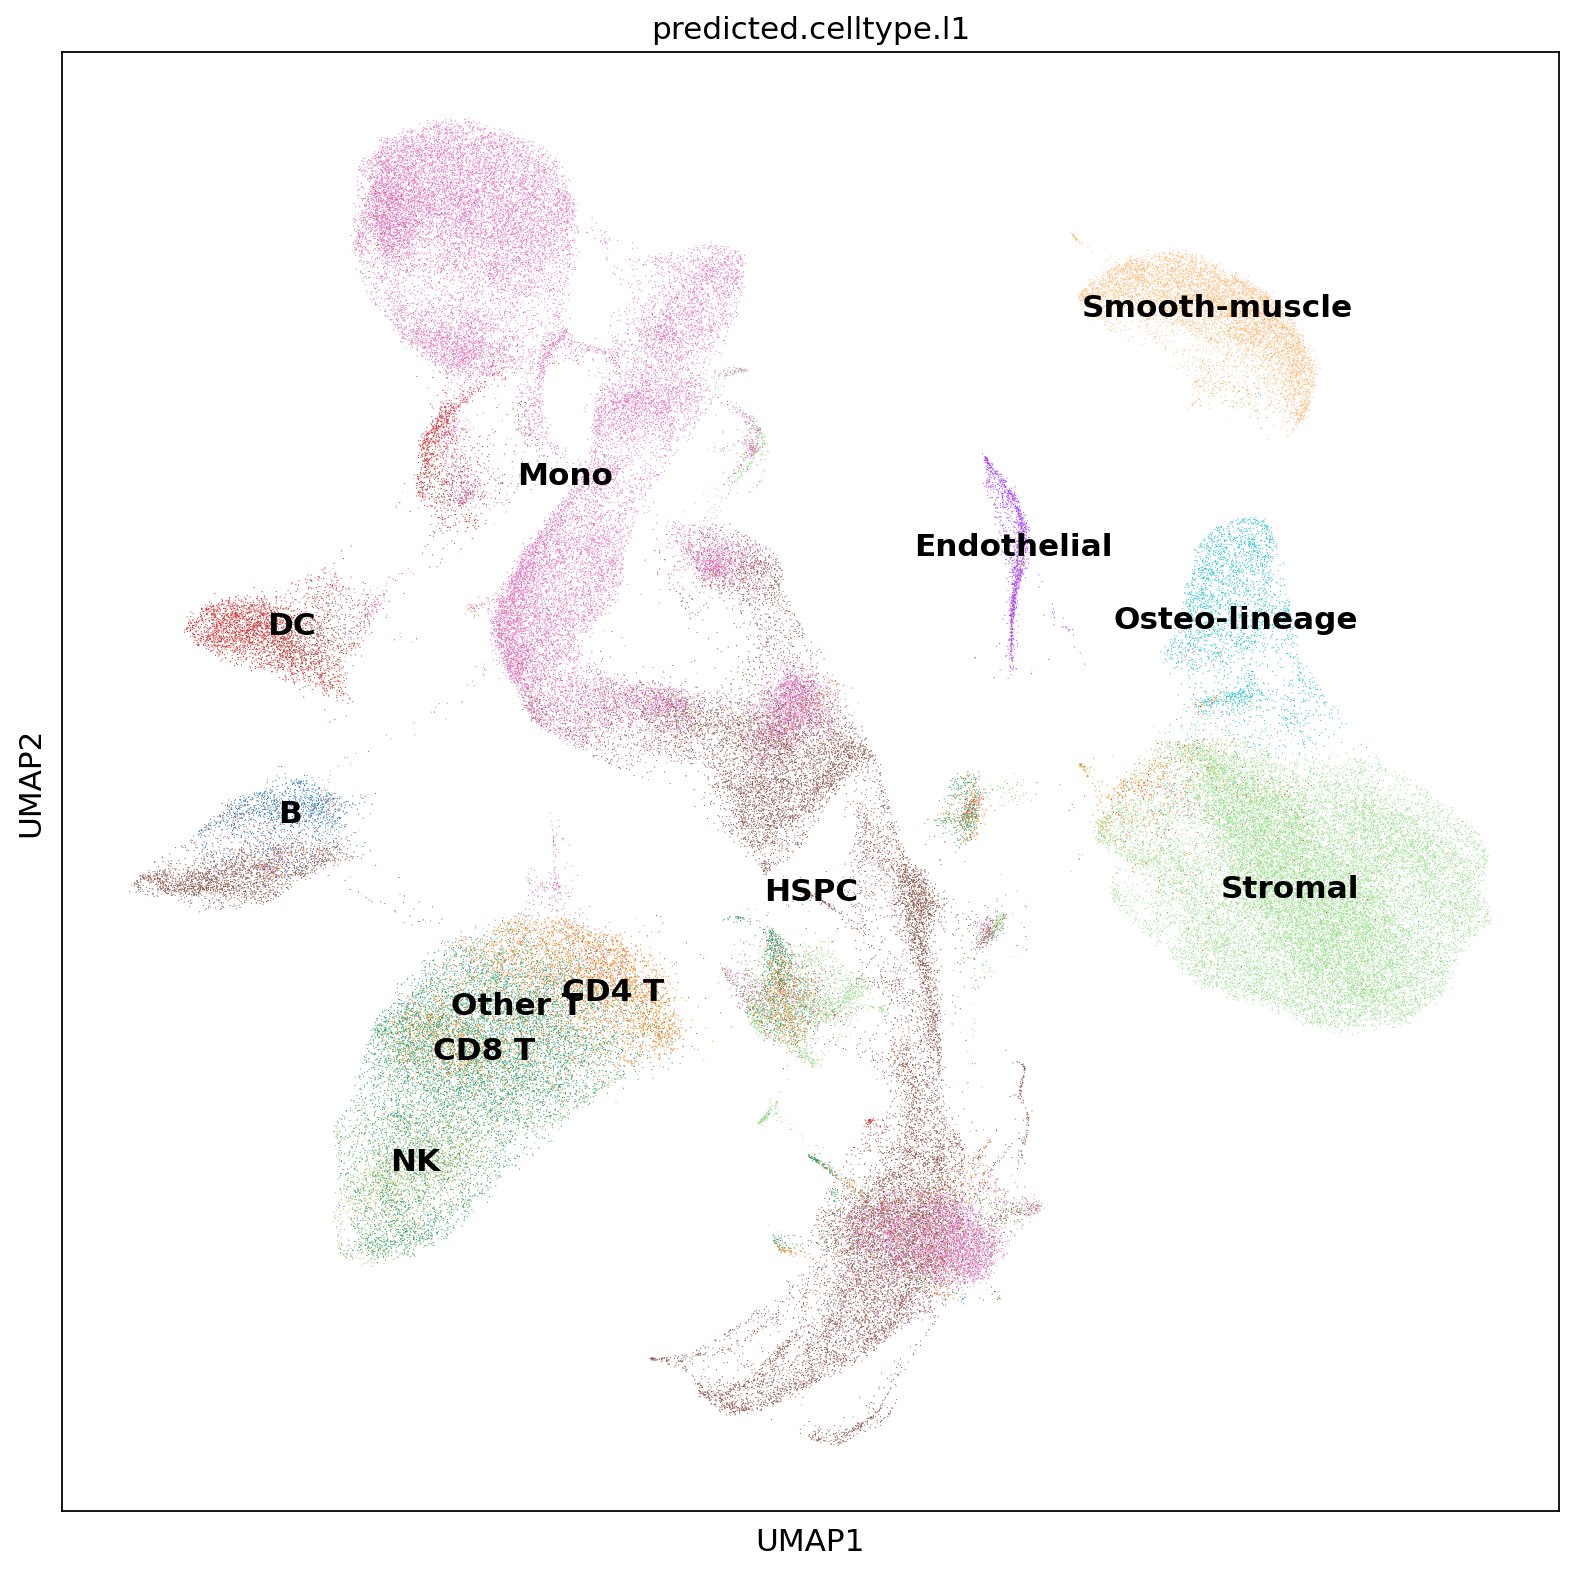

In [52]:
sc.pl.umap(adata_new, color = ['predicted.celltype.l1'], legend_loc = 'on data')

In [53]:
adata_new.obs['predicted.celltype.l2'] = adata_new.obs['predicted.celltype.l2'].astype('str')

In [55]:
sc.set_figure_params(figsize = [20,20])

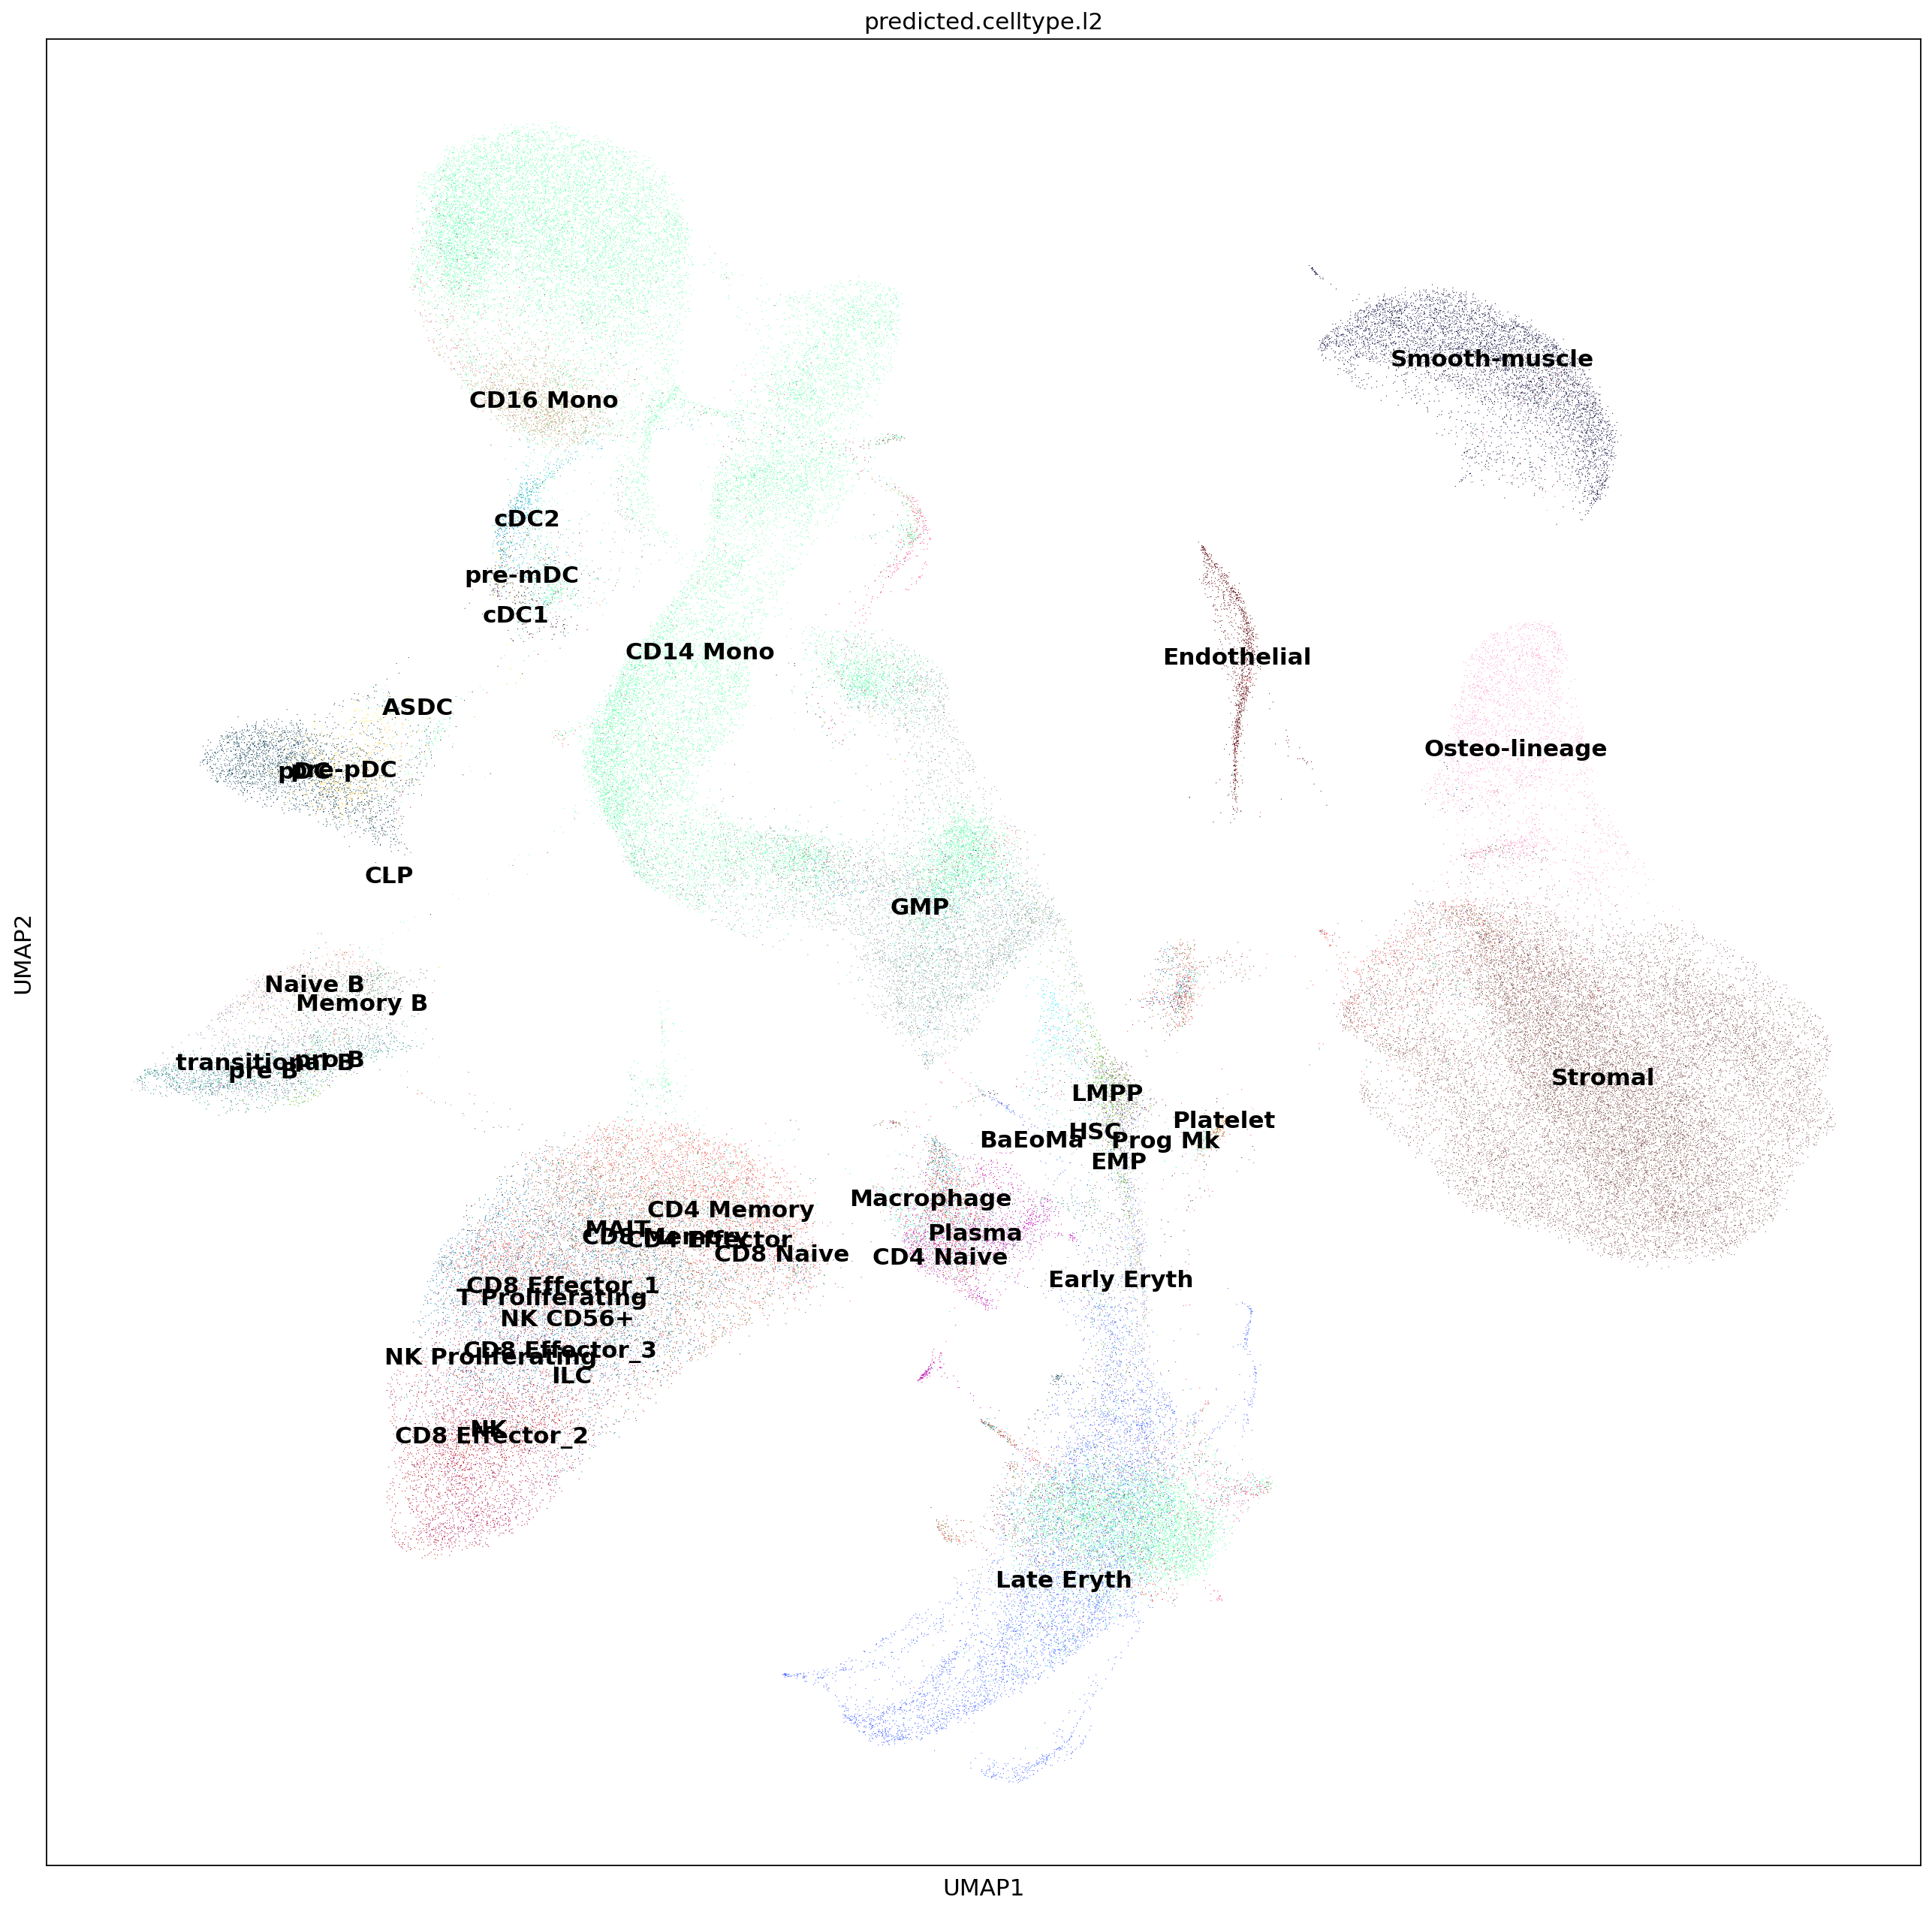

In [64]:
sc.pl.umap(adata_new, color = ['predicted.celltype.l2'], legend_loc = 'on data')

In [58]:
celltypel2 = pd.read_csv(r"/mnt/c/Bioinf/nelson_celltypel2.csv")

In [59]:
celltypel2

Unnamed: 0  \
0                     HS_BM_1_AAACCCAAGACACACG_lund   
1                     HS_BM_1_AAACCCAAGTGTTGTC_lund   
2                     HS_BM_1_AAACGAATCGCGTCGA_lund   
3                     HS_BM_1_AAACGAATCTCGTCGT_lund   
4                     HS_BM_1_AAACGCTAGCGAGTCA_lund   
...                                             ...   
117303  BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma   
117304  BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma   
117305  BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma   
117306  BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma   
117307  BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma   

                                             CellID     CellTypeL2  
0                     HS_BM_1_AAACCCAAGACACACG_lund            GMP  
1                     HS_BM_1_AAACCCAAGTGTTGTC_lund      CD14 Mono  
2                     HS_BM_1_AAACGAATCGCGTCGA_lund         BaEoMa  
3                     HS_BM_1_AAACGAATCTCGTCGT_lund     Late Eryth  
4                     HS_BM_1_AAACGCTAGCGAGTCA_lund    Early Eryth  
...                                             ...            ...  
117303  BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma        Stromal  
117304  BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma        Stromal  
117305  BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma        Stromal  
117306  BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma        Stromal  
117307  BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  Smooth-muscle  

[117308 rows x 3 columns]

In [60]:
if 'Unnamed: 0' in celltypel2.columns:
    celltypel2.drop('Unnamed: 0', axis=1, inplace=True)

# Set the 'CellID' column as the new index of the DataFrame
celltypel2.set_index('CellID', inplace=True)

In [62]:
celltypel2['CellTypeL2']

CellID
HS_BM_1_AAACCCAAGACACACG_lund                            GMP
HS_BM_1_AAACCCAAGTGTTGTC_lund                      CD14 Mono
HS_BM_1_AAACGAATCGCGTCGA_lund                         BaEoMa
HS_BM_1_AAACGAATCTCGTCGT_lund                     Late Eryth
HS_BM_1_AAACGCTAGCGAGTCA_lund                    Early Eryth
                                                   ...      
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma          Stromal
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma          Stromal
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma          Stromal
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma          Stromal
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma    Smooth-muscle
Name: CellTypeL2, Length: 117308, dtype: object

In [63]:
adata_new.obs['predicted.celltype.l2'] = celltypel2['CellTypeL2']

In [65]:
adata.obs['tissue'] = adata_new.obs['predicted.celltype.l1']

In [66]:
adata.obs['nCount_RNA_Seurat'] = adata_new.obs['nCount_RNA']

In [67]:
adata.obs['nFeature_RNA_Seurat'] = adata_new.obs['nFeature_RNA']

In [68]:
adata.obs['nCount_refAssay'] = adata_new.obs['nCount_refAssay']

In [69]:
adata.obs['nFeature_refAssay'] = adata_new.obs['nFeature_refAssay']

In [70]:
adata.obs['predicted.celltype.l2.score'] = adata_new.obs['predicted.celltype.l2.score']

In [71]:
adata.obs['predicted.celltype.l2'] = adata_new.obs['predicted.celltype.l2']

In [72]:
adata.obs['predicted.celltype.l1.score'] = adata_new.obs['predicted.celltype.l1.score']

In [73]:
adata.obs['predicted.celltype.l1'] = adata_new.obs['predicted.celltype.l1']

In [74]:
adata.obs['mapping.score'] = adata_new.obs['mapping.score']

In [75]:
obs_dataframe = adata.obs

# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)
print(obs_dataframe)

                                                        samples  n_genes  \
HS_BM_1_AAACCCAAGACACACG_lund                GSE190965_sample_1     2264   
HS_BM_1_AAACCCAAGTGTTGTC_lund                GSE190965_sample_1     3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                GSE190965_sample_1      846   
HS_BM_1_AAACGAATCTCGTCGT_lund                GSE190965_sample_1     7441   
HS_BM_1_AAACGCTAGCGAGTCA_lund                GSE190965_sample_1     6539   
...                                                         ...      ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma  GSE202813_sample_8     2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma  GSE202813_sample_8     1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma  GSE202813_sample_8     1343   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma  GSE202813_sample_8     1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  GSE202813_sample_8     1435   

                                                   gse  age_yo  \
HS_BM_1_AAACCCAAGACAC

In [76]:
adata.write_h5ad('/mnt/c/Bioinf/nelson_azimuth_upd_EK_anno_final.h5ad')

In [3]:
adata = sc.read_h5ad('/mnt/c/Bioinf/nelson_azimuth_upd_EK_anno_final.h5ad')

In [4]:
obs_dataframe = adata.obs

# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)
print(obs_dataframe)

                                                        samples  n_genes  \
HS_BM_1_AAACCCAAGACACACG_lund                GSE190965_sample_1     2264   
HS_BM_1_AAACCCAAGTGTTGTC_lund                GSE190965_sample_1     3649   
HS_BM_1_AAACGAATCGCGTCGA_lund                GSE190965_sample_1      846   
HS_BM_1_AAACGAATCTCGTCGT_lund                GSE190965_sample_1     7441   
HS_BM_1_AAACGCTAGCGAGTCA_lund                GSE190965_sample_1     6539   
...                                                         ...      ...   
BMM2-Niche_TTTGTCACACATGACT-1_benign_stroma  GSE202813_sample_8     2019   
BMM2-Niche_TTTGTCAGTTATCACG-1_benign_stroma  GSE202813_sample_8     1278   
BMM2-Niche_TTTGTCATCACTTACT-1_benign_stroma  GSE202813_sample_8     1343   
BMM2-Niche_TTTGTCATCACTTATC-1_benign_stroma  GSE202813_sample_8     1509   
BMM2-Niche_TTTGTCATCTCCCTGA-1_benign_stroma  GSE202813_sample_8     1435   

                                                   gse  age_yo  \
HS_BM_1_AAACCCAAGACAC

In [6]:
adata.obs['assay_ontology_term_id'].value_counts()

EFO:0030080    117308
Name: assay_ontology_term_id, dtype: int64

In [9]:
import re

In [10]:
barcode_regex = re.compile('[ATGC]+')

# Function to extract barcode using regex
def extract_barcode(name):
    match = barcode_regex.search(name)
    return match.group(0) if match else ''

# Extract barcodes from row names
barcodes = adata.obs_names.map(extract_barcode)

# Quantify the size of each barcode
barcode_lengths = barcodes.str.len()

# Generate a value counts table for barcode lengths
length_counts = barcode_lengths.value_counts()

print(length_counts)

16    81926
1     35382
dtype: int64


In [11]:
adata.obs['doi'].value_counts()

doi:10.7554/eLife.81656            52607
doi:10.18632/aging.203124          23352
doi:10.1016/j.ccell.2021.09.005    15177
doi:10.1136/rmdopen-2022-002314    14467
doi:10.31083/j.fbl2710295           8840
doi:10.1016/j.stem.2020.11.004      1663
doi:10.1186/s13287-023-03437-x      1202
Name: doi, dtype: int64

In [12]:
#3 v 3
#3 v 3
#3 v 2
#3 v 3
#3 v 3
#3 v 2
#3 v 2

In [13]:
doi_to_tech = {
    'doi:10.7554/eLife.81656': '3 v 3',
    'doi:10.18632/aging.203124': '3 v 3',
    'doi:10.1016/j.ccell.2021.09.005': '3 v 2',
    'doi:10.1136/rmdopen-2022-002314': '3 v 3',
    'doi:10.31083/j.fbl2710295': '3 v 3',
    'doi:10.1016/j.stem.2020.11.004': '3 v 2',
    'doi:10.1186/s13287-023-03437-x': '3 v 2'
}

# Mapping of technology versions to EFO codes
tech_to_efo = {
    '3 v 2': 'EFO:0009899',
    '3 v 3': 'EFO:0009922'
}



# Apply the mappings to create the 'assay_ontology_term_id' column
adata.obs['assay_ontology_term_id'] = adata.obs['doi'].map(doi_to_tech).map(tech_to_efo)

In [14]:
adata.obs['assay_ontology_term_id'].value_counts()

EFO:0009922    99266
EFO:0009899    18042
Name: assay_ontology_term_id, dtype: int64

In [15]:
adata.obs['age_yo'].value_counts()

31.0    15617
73.0    14467
45.0     8374
61.0     4521
66.0     3680
77.0      912
57.0      751
Name: age_yo, dtype: int64

In [16]:
age_to_hsapdv = {
    31.0: 'HsapDv:0000125',
    73.0: 'HsapDv:0000167',
    45.0: 'HsapDv:0000139',
    61.0: 'HsapDv:0000155',
    66.0: 'HsapDv:0000160',
    77.0: 'HsapDv:0000171',
    57.0: 'HsapDv:0000151'
}



# Apply the mapping to create the 'development_stage_term_id' column
adata.obs['development_stage_term_id'] = adata.obs['age_yo'].map(age_to_hsapdv)

In [17]:
adata.obs['development_stage_term_id'].value_counts()

HsapDv:0000125    15617
HsapDv:0000167    14467
HsapDv:0000139     8374
HsapDv:0000155     4521
HsapDv:0000160     3680
HsapDv:0000171      912
HsapDv:0000151      751
Name: development_stage_term_id, dtype: int64

In [18]:
adata.obs['disease_ontology_term_id'].value_counts()

PATO:0000461     92338
MONDO_0005178    14467
HP_0000938        8840
MONDO:0002571      912
MONDO:0018906      751
Name: disease_ontology_term_id, dtype: int64

In [19]:
adata.obs['sex_ontology_term_id'].value_counts()

unknown         92293
PATO:0000383    13807
PATO:0000384    11208
Name: sex_ontology_term_id, dtype: int64

In [20]:
adata.obs['predicted.celltype.l1'].value_counts()

Mono             34156
Stromal          25498
HSPC             22951
CD8 T            10786
CD4 T             6346
Smooth-muscle     5777
DC                3650
Osteo-lineage     2812
NK                2230
Endothelial       1301
B                 1187
Other T            614
Name: predicted.celltype.l1, dtype: int64

In [21]:
celltype_to_cl = {
    'Mono': 'CL:0000576',
    'Stromal': 'CL:0010001',
    'HSPC': 'CL:0008001',
    'CD8 T': 'CL:0000625',
    'CD4 T': 'CL:0000624',
    'Smooth-muscle': 'CL:0000192',
    'DC': 'CL:0001056',
    'Osteo-lineage': 'CL:0001035',
    'NK': 'CL:0000814',
    'Endothelial': 'CL:0000115',
    'B': 'CL:0000945',
    'Other T': 'CL:0000084'
}

# Replace '_' with ':' in CL IDs
celltype_to_cl = {k: v.replace('_', ':') for k, v in celltype_to_cl.items()}



# Apply the mapping to create the 'predicted.celltype.l1_cell_type_ontology_term_id' column
adata.obs['predicted.celltype.l1_cell_type_ontology_term_id'] = adata.obs['predicted.celltype.l1'].map(celltype_to_cl)

In [22]:
adata.obs['predicted.celltype.l1_cell_type_ontology_term_id'].value_counts()

CL:0000576    34156
CL:0010001    25498
CL:0008001    22951
CL:0000625    10786
CL:0000624     6346
CL:0000192     5777
CL:0001056     3650
CL:0001035     2812
CL:0000814     2230
CL:0000115     1301
CL:0000945     1187
CL:0000084      614
Name: predicted.celltype.l1_cell_type_ontology_term_id, dtype: int64

In [23]:
adata.obs['predicted.celltype.l2'].value_counts()

CD14 Mono           33623
Stromal             22298
CD4 Memory           6817
Late Eryth           6093
GMP                  5859
Smooth-muscle        5777
CD8 Effector_1       4679
CD8 Memory           2953
Osteo-lineage        2812
pDC                  2800
CD8 Effector_2       2269
NK                   2208
Plasma               1866
CD16 Mono            1801
BaEoMa               1762
HSC                  1654
pre B                1327
Endothelial          1301
Memory B              976
Macrophage            911
Early Eryth           840
transitional B        824
CD4 Naive             806
cDC2                  734
MAIT                  642
LMPP                  583
pre-pDC               575
EMP                   420
Naive B               403
CLP                   326
Prog Mk               245
Platelet              218
pro B                 205
pre-mDC               192
CD8 Effector_3        125
cDC1                  101
CD8 Naive              91
ASDC                   76
ILC         

In [24]:
# Mapping of cell populations to their CL IDs
celltype_to_cl = {
    'CD14 Mono': 'CL:0001054',
    'Stromal': 'CL:0010001',
    'CD4 Memory': 'CL:0000897',
    'Late Eryth': 'CL:0000764',
    'GMP': 'CL:0000557',
    'Smooth-muscle': 'CL:0000192',
    'CD8 Effector_1': 'CL:0001050',
    'CD8 Memory': 'CL:0000909',
    'Osteo-lineage': 'CL:0001035',
    'pDC': 'CL:0001058',
    'CD8 Effector_2': 'CL:0001050',
    'NK': 'CL:0000939',
    'Plasma': 'CL:0000786',
    'CD16 Mono': 'CL:0002396',
    'BaEoMa': 'CL:0002028',
    'HSC': 'CL:0000037',
    'pre B': 'CL:0000817',
    'Endothelial': 'CL:0000115',
    'Memory B': 'CL:0000787',
    'Macrophage': 'CL:0000235',
    'Early Eryth': 'CL:0000764',
    'transitional B': 'CL:0000818',
    'CD4 Naive': 'CL:0000895',
    'cDC2': 'CL:0002399',
    'MAIT': 'CL:0000940',
    'LMPP': 'CL:0000837',
    'pre-pDC': 'CL:0000992',
    'EMP': 'CL:0000050',
    'Naive B': 'CL:0000788',
    'CLP': 'CL:0000051',
    'Prog Mk': 'CL:0000553',
    'Platelet': 'CL:0000233',
    'pro B': 'CL:0000826',
    'pre-mDC': 'CL:0001029',
    'CD8 Effector_3': 'CL:0001050',
    'cDC1': 'CL:0002394',
    'CD8 Naive': 'CL:0000900',
    'ASDC': 'CL:0001056',
    'ILC': 'CL:0000824',
    'CD4 Effector': 'CL:0001044',
    'NK CD56+': 'CL:0000938',
    'T Proliferating': 'CL:0000084',
    'NK Proliferating': 'CL:0000824'
}



# Apply the mapping to create the 'predicted.celltype.l1_cell_type_ontology_term_id' column
adata.obs['predicted.celltype.l2_cell_type_ontology_term_id'] = adata.obs['predicted.celltype.l2'].map(celltype_to_cl)


In [25]:
adata.obs['predicted.celltype.l2_cell_type_ontology_term_id'].value_counts()

CL:0001054    33623
CL:0010001    22298
CL:0001050     7073
CL:0000764     6933
CL:0000897     6817
CL:0000557     5859
CL:0000192     5777
CL:0000909     2953
CL:0001035     2812
CL:0001058     2800
CL:0000939     2208
CL:0000786     1866
CL:0002396     1801
CL:0002028     1762
CL:0000037     1654
CL:0000817     1327
CL:0000115     1301
CL:0000787      976
CL:0000235      911
CL:0000818      824
CL:0000895      806
CL:0002399      734
CL:0000940      642
CL:0000837      583
CL:0000992      575
CL:0000050      420
CL:0000788      403
CL:0000051      326
CL:0000553      245
CL:0000233      218
CL:0000826      205
CL:0001029      192
CL:0002394      101
CL:0000900       91
CL:0001056       76
CL:0000824       42
CL:0001044       29
CL:0000938       26
CL:0000084       19
Name: predicted.celltype.l2_cell_type_ontology_term_id, dtype: int64

In [26]:
adata.write_h5ad('/mnt/c/Bioinf/nelson_azimuth_upd_EK_anno_final_updated.h5ad')